In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sb

In [2]:
df=pd.read_csv('./Downloads/Bank.csv')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,retired,married,high.school,unknown,no,yes,telephone,jun,thu,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,housemaid,married,basic.4y,unknown,no,no,telephone,may,thu,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,technician,married,professional.course,no,no,yes,telephone,oct,tue,...,2,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0


In [3]:
df.dtypes


age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
y                   int64
dtype: object

In [4]:
df.education.unique()

array(['basic.4y', 'unknown', 'university.degree', 'high.school',
       'basic.9y', 'professional.course', 'basic.6y', 'illiterate'],
      dtype=object)

In [5]:
df.job.unique()

array(['blue-collar', 'technician', 'management', 'services', 'retired',
       'admin.', 'housemaid', 'unemployed', 'entrepreneur',
       'self-employed', 'unknown', 'student'], dtype=object)

# Data Preparation

###  Howtohandle missing values in the dataset ?

In [8]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

In [9]:
df.education.value_counts()

education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64

In [10]:
df.job.value_counts()

job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

In [11]:
df.marital.value_counts()

marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64

In [12]:
df.default.value_counts()

default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64

In [13]:
df.housing.value_counts()

housing
yes        21576
no         18622
unknown      990
Name: count, dtype: int64

In [14]:
df.loan.value_counts()

loan
no         33950
yes         6248
unknown      990
Name: count, dtype: int64

In [42]:
df.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


## Exploratory Data Analysis (EDA):

### Whatis the distribution of key features (age, job, marital status, etc.)?

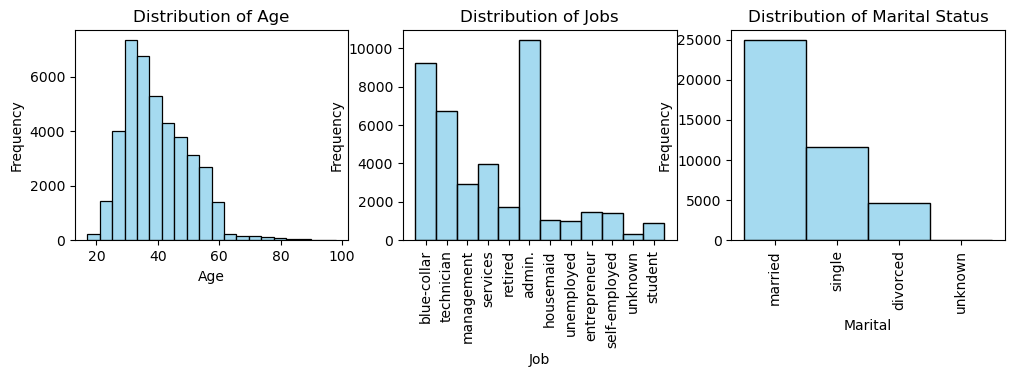

In [15]:
plt.figure(figsize=(12,6))

plt.subplot(2,3,1)
sb.histplot(df.age,bins=20,color='skyblue', edgecolor='black',)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(2,3,2)
sb.histplot(df.job,color='skyblue', edgecolor='black')
plt.xticks(rotation = 90)
plt.title('Distribution of Jobs')
plt.xlabel('Job')
plt.ylabel('Frequency')

plt.subplot(2,3,3)
sb.histplot(df.marital,color='skyblue', edgecolor='black')
plt.xticks(rotation = 90)
plt.title('Distribution of Marital Status')
plt.xlabel('Marital')
plt.ylabel('Frequency')

plt.show()

### Which customer profiles (job, education, etc.) have higher subscription rates?

<Figure size 3500x2000 with 0 Axes>

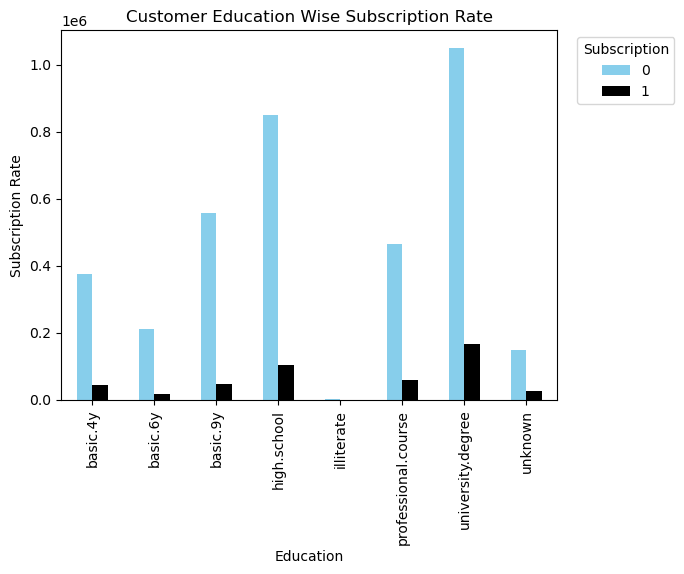

In [16]:
dt= df.groupby('education')['y'].value_counts().unstack(fill_value=0)*100
plt.figure(figsize=(35,20))
dt.plot(kind='bar',color=['skyblue','black'])
plt.xticks(rotation = 90)
plt.title('Customer Education Wise Subscription Rate')
plt.xlabel('Education')
plt.ylabel('Subscription Rate')
plt.legend(title='Subscription',bbox_to_anchor=(1.25,1.0))

plt.show()

<Figure size 3500x2000 with 0 Axes>

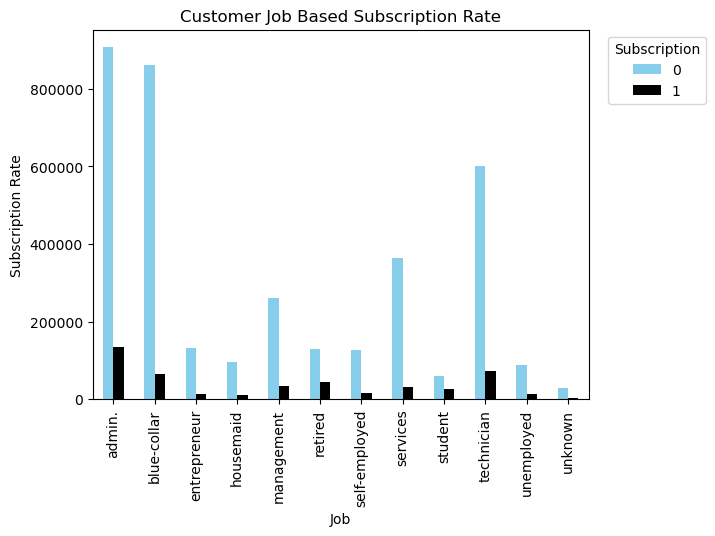

In [17]:
ds= df.groupby('job')['y'].value_counts().unstack(fill_value=0)*100
plt.figure(figsize=(35,20))
ds.plot(kind='bar',color=['skyblue','black'])
plt.xticks(rotation = 90)
plt.title('Customer Job Based Subscription Rate')
plt.xlabel('Job')
plt.ylabel('Subscription Rate')
plt.legend(title='Subscription',bbox_to_anchor=(1.25,1.0))

plt.show()

In [18]:
ds

y,0,1
job,,
admin.,907000,135200
blue-collar,861600,63800
entrepreneur,133200,12400
housemaid,95400,10600
management,259600,32800
retired,128600,43400
self-employed,127200,14900
services,364600,32300
student,60000,27500


### Whatare the relationships between input features and the target variable?

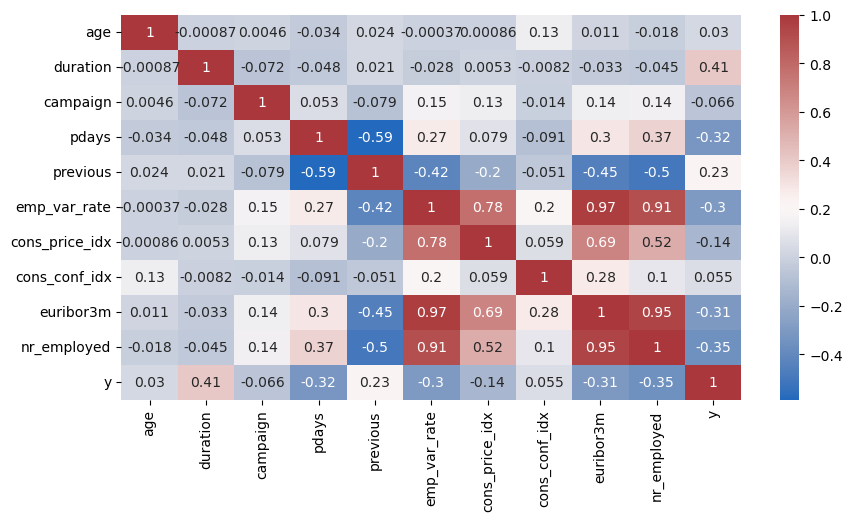

In [19]:
corr=df.corr(numeric_only=True)
plt.figure(figsize=(10,5))
sb.heatmap(corr,annot=True,cmap=sb.color_palette("vlag", as_cmap=True))
plt.show()

## Client Profile Analysis

### Howdojob, marital status, and education affect subscription decisions?

In [20]:
me= df.groupby('education')['y'].value_counts().unstack(fill_value=0)*100
me

y,0,1
education,,
basic.4y,374800,42800
basic.6y,210400,18800
basic.9y,557200,47300
high.school,848400,103100
illiterate,1400,400
professional.course,464800,59500
university.degree,1049800,167000
unknown,148000,25100


<Figure size 3500x2000 with 0 Axes>

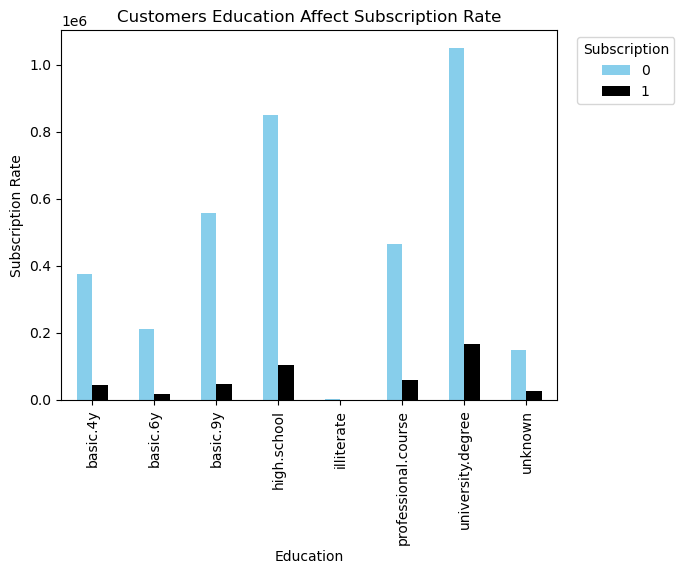

In [21]:
me= df.groupby('education')['y'].value_counts().unstack(fill_value=0)*100
plt.figure(figsize=(35,20))
me.plot(kind='bar',color=['skyblue','black'])
plt.xticks(rotation = 90)
plt.title('Customers Education Affect Subscription Rate')
plt.xlabel('Education')
plt.ylabel('Subscription Rate')
plt.legend(title='Subscription',bbox_to_anchor=(1.25,1.0))

In [22]:
jb= df.groupby('job')['y'].value_counts().unstack(fill_value=0)*100
jb

y,0,1
job,,
admin.,907000,135200
blue-collar,861600,63800
entrepreneur,133200,12400
housemaid,95400,10600
management,259600,32800
retired,128600,43400
self-employed,127200,14900
services,364600,32300
student,60000,27500


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'admin.'),
  Text(1, 0, 'blue-collar'),
  Text(2, 0, 'entrepreneur'),
  Text(3, 0, 'housemaid'),
  Text(4, 0, 'management'),
  Text(5, 0, 'retired'),
  Text(6, 0, 'self-employed'),
  Text(7, 0, 'services'),
  Text(8, 0, 'student'),
  Text(9, 0, 'technician'),
  Text(10, 0, 'unemployed'),
  Text(11, 0, 'unknown')])

<Figure size 1000x400 with 0 Axes>

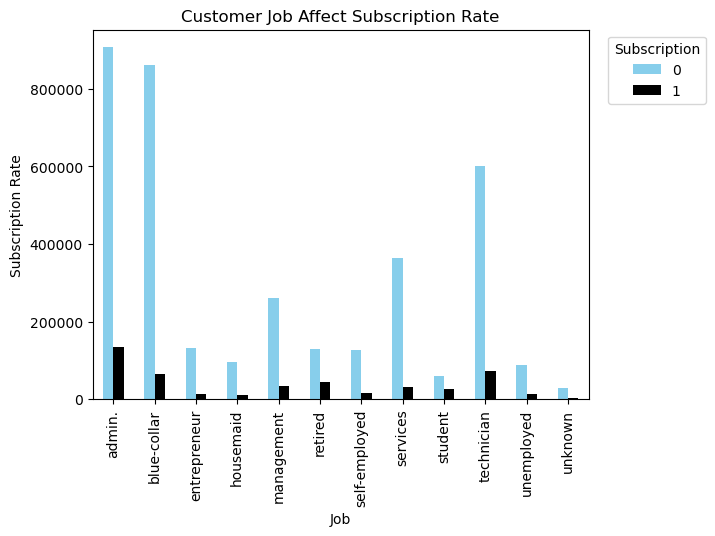

In [24]:
plt.figure(figsize=(10,4))

jb.plot(kind='bar',color=['skyblue','black'])
plt.title('Customer Job Affect Subscription Rate')
plt.xlabel('Job')
plt.ylabel('Subscription Rate')
plt.legend(title='Subscription',bbox_to_anchor=(1.25,1.0))
plt.xticks(rotation = 90)

In [36]:
mt= df.groupby('marital')['y'].value_counts().unstack(fill_value=0)*100
mt

y,0,1
marital,,
divorced,413600,47600
married,2239600,253200
single,994800,162000
unknown,6800,1200


<Figure size 1000x400 with 0 Axes>

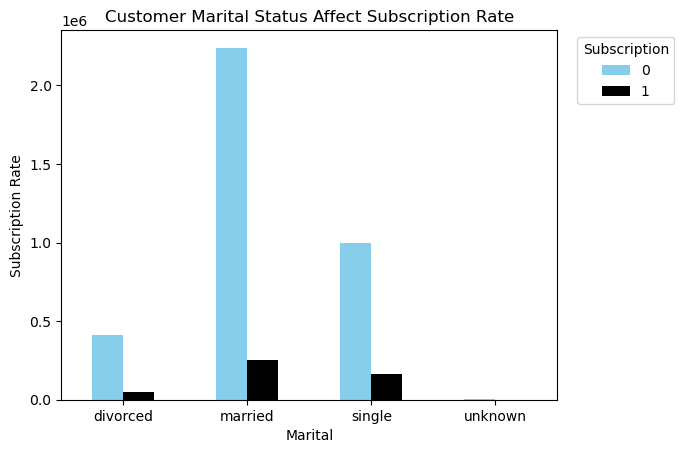

In [37]:
plt.figure(figsize=(10,4))

mt.plot(kind='bar',color=['skyblue','black'])
plt.title('Customer Marital Status Affect Subscription Rate')
plt.xlabel('Marital')
plt.ylabel('Subscription Rate')
plt.legend(title='Subscription',bbox_to_anchor=(1.25,1.0))
plt.xticks(rotation = 0)

plt.show()

In [39]:
sc

''

## Campaign Effectiveness:

### Does the duration of the call increase the chances of a successful subscription?

C:\Users\simran\AppData\Local\Temp\ipykernel_2028\2965250209.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.boxplot(x=df.y,y=df.duration,palette={'0': 'skyblue', '1': 'black'})


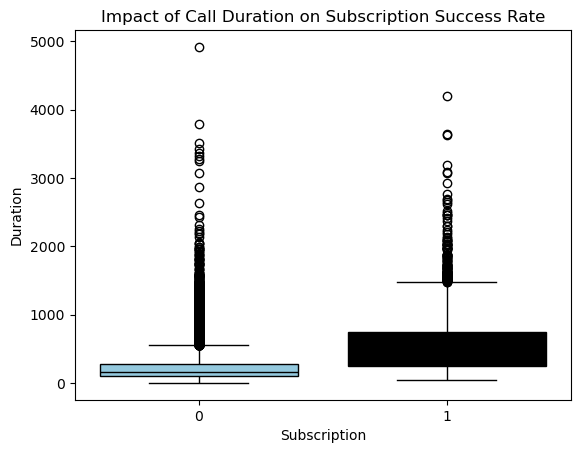

In [41]:
sb.boxplot(x=df.y,y=df.duration,palette={'0': 'skyblue', '1': 'black'})
plt.title('Impact of Call Duration on Subscription Success Rate')
plt.xlabel('Subscription')
plt.ylabel('Duration')
plt.show()

### Which contact methods (e.g., telephone, cellular) are most effective?

In [45]:
cs = df.groupby('contact')['y'].value_counts(normalize=True).unstack(fill_value=0)

In [46]:
cs

y,0,1
contact,,
cellular,0.852624,0.147376
telephone,0.947687,0.052313


<Figure size 1000x400 with 0 Axes>

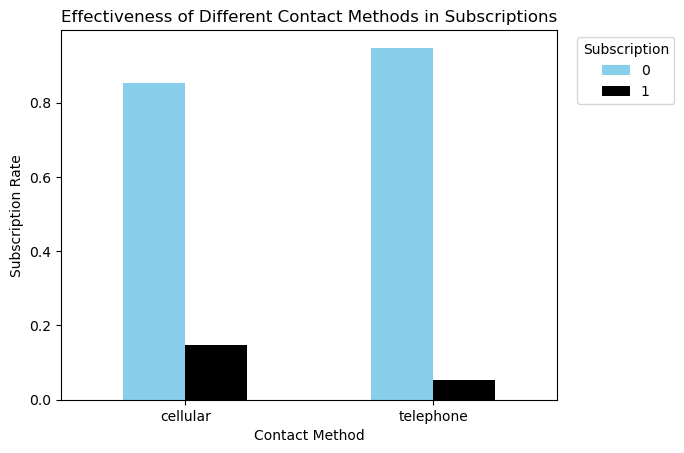

In [47]:
plt.figure(figsize=(10,4))

cs.plot(kind='bar',color=['skyblue','black'])
plt.title('Effectiveness of Different Contact Methods in Subscriptions')
plt.xlabel('Contact Method')
plt.ylabel('Subscription Rate')
plt.legend(title='Subscription',bbox_to_anchor=(1.25,1.0))
plt.xticks(rotation = 0)

plt.show()

### Howmanycontacts are usually needed before a client subscribes?

In [48]:
css= df.groupby('y')['campaign'].mean()
css

y
0    2.633085
1    2.051724
Name: campaign, dtype: float64

C:\Users\simran\AppData\Local\Temp\ipykernel_2028\3230569207.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.boxplot(x=df.y,y=df.campaign,palette={'0': 'skyblue', '1': 'black'})


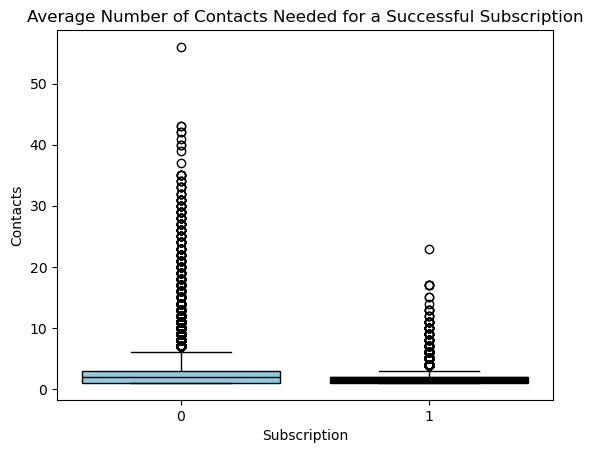

In [49]:
sb.boxplot(x=df.y,y=df.campaign,palette={'0': 'skyblue', '1': 'black'})
plt.title('Average Number of Contacts Needed for a Successful Subscription')
plt.xlabel('Subscription')
plt.ylabel('Contacts')
plt.xticks(rotation = 0)

plt.show()

##  Previous Campaign Impact:

### Howdoestheoutcome of previous campaigns influence the current one?


In [52]:
dss = df.groupby('poutcome')['y'].value_counts(normalize=True).unstack(fill_value=0)*100
dss

y,0,1
poutcome,,
failure,85.771402,14.228598
nonexistent,91.167787,8.832213
success,34.887109,65.112891


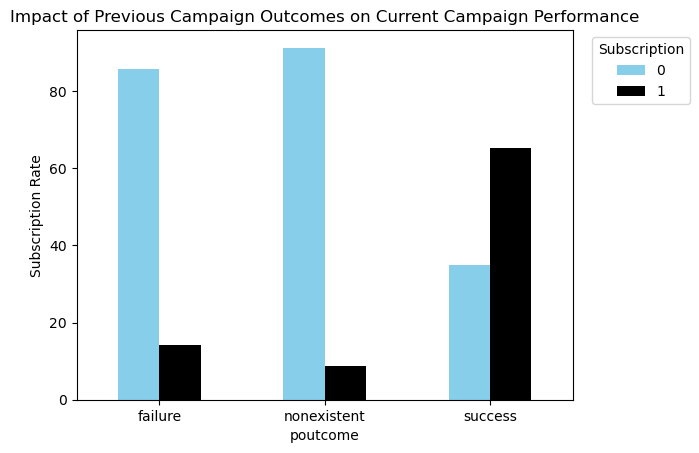

In [53]:
dss.plot(kind='bar',color=['skyblue','black'])
plt.title('Impact of Previous Campaign Outcomes on Current Campaign Performance')
plt.xlabel('poutcome')
plt.ylabel('Subscription Rate')
plt.legend(title='Subscription',bbox_to_anchor=(1.25,1.0))
plt.xticks(rotation = 0)
plt.show()

### Does having prior contact with a client increase the chance of success?

In [56]:
kc=df.groupby('previous')['y'].value_counts(normalize=True).unstack(fill_value=0)*100
kc

y,0,1
previous,,
0,91.167787,8.832213
1,78.798509,21.201491
2,53.580902,46.419098
3,40.740741,59.259259
4,45.714286,54.285714
5,27.777778,72.222222
6,40.000000,60.000000
7,100.000000,0.000000


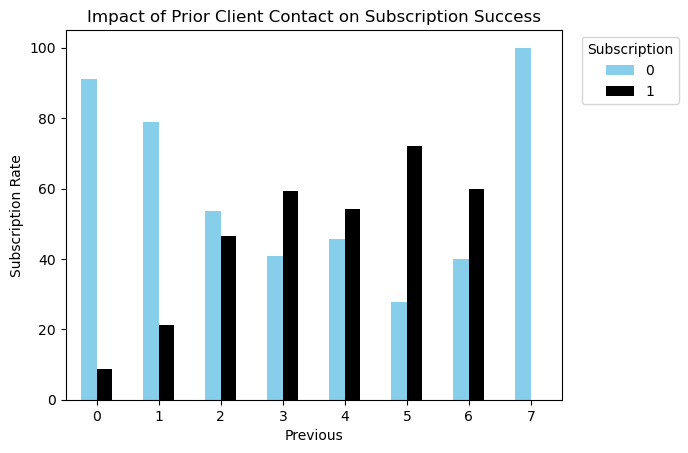

In [57]:
kc.plot(kind='bar',color= ['skyblue','black'])
plt.title('Impact of Prior Client Contact on Subscription Success')
plt.xlabel('Previous')
plt.ylabel('Subscription Rate')
plt.legend(title='Subscription',bbox_to_anchor=(1.25,1.0))
plt.xticks(rotation = 0)
plt.show()

##  Temporal Analysis:

### Which months have higher subscription rates?

In [58]:
nc = df.groupby('month')['y'].value_counts(normalize=True).unstack(fill_value=0)
nc

y,0,1
month,,
apr,0.795213,0.204787
aug,0.893979,0.106021
dec,0.510989,0.489011
jul,0.909534,0.090466
jun,0.894885,0.105115
mar,0.494505,0.505495
may,0.935653,0.064347
nov,0.898561,0.101439
oct,0.561281,0.438719


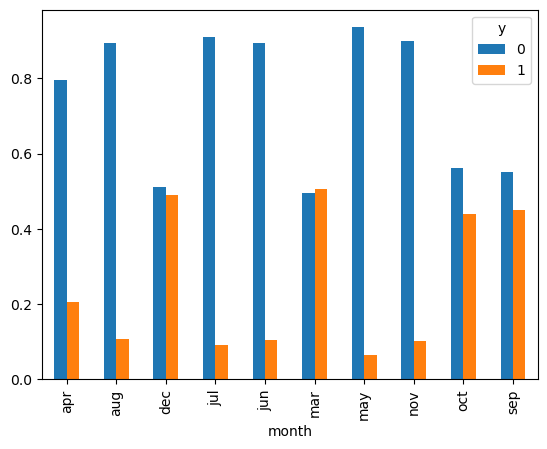

In [59]:
nc.plot(kind='bar')
plt.show()

### Is there any effect of the day of the week on subscription success?

In [60]:
cn = df.groupby('day_of_week')['y'].value_counts(normalize=True).unstack(fill_value=0)
cn

y,0,1
day_of_week,,
fri,0.891913,0.108087
mon,0.900517,0.099483
thu,0.878812,0.121188
tue,0.882200,0.117800
wed,0.883329,0.116671


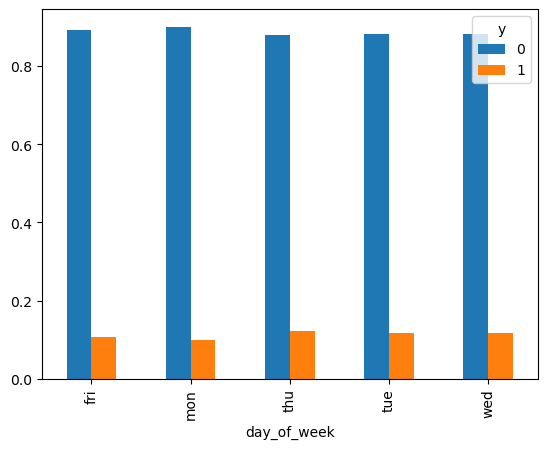

In [61]:
cn.plot(kind='bar')
plt.show()